In [ ]:
#Install Required Libraries
!pip install numpy pandas tensorflow

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import math

In [ ]:
# Load dataset
file_path = 'Plantation.csv'  # Update with the correct path
df = pd.read_csv("/Plantation.csv")

# Display the first few rows
print(df.head())


  Plant Type  Plant Spacing (m)  Row Spacing (m)   Plant Grid  Area (acres)  \
0        Tea               1.20             0.60  Rectangular         100.0   
1     Rubber               2.40             3.00  Rectangular         150.0   
2   Cinnamon               1.20             0.90  Rectangular         128.0   
3    Coconut               3.00             6.00  Rectangular         210.0   
4      Rice                0.14             0.14       Square         100.0   

   Density (plants per sq m)  Total Plants  
0                          1        561537  
1                          0         87556  
2                          1        482358  
3                          0         52609  
4                         51      20663016  


In [ ]:
#Data Preprocessing

# Add a new column for Plant Grid Type as numerical categories
df['Plant Grid Type'] = df['Plant Grid'].map({'Rectangular': 0, 'Square': 1, 'Triangular': 2})

# Convert Area (acres) to square meters (1 acre = 4046.86 sq meters)
df['Area (sq m)'] = df['Area (acres)'] * 4046.86

# Convert necessary columns to numeric
df['Plant Spacing (m)'] = pd.to_numeric(df['Plant Spacing (m)'], errors='coerce')
df['Row Spacing (m)'] = pd.to_numeric(df['Row Spacing (m)'], errors='coerce')


In [ ]:
# Define features and target variables
X = df[['Plant Grid Type', 'Plant Spacing (m)', 'Row Spacing (m)', 'Area (acres)']].values
y = df[['Density (plants per sq m)', 'Total Plants']].values


In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2)  # Output: Density and Total Plants
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile and train the model with metrics
#model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])  # 'mae' = Mean Absolute Error
#model.compile(optimizer='adam', loss='mean_absolute_error')

# Compile and train the model with metrics
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Print a message after training is completed
print("Training completed")

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 22154903027712.0000 - mae: 1533798.3750 - mse: 22154903027712.0000 - val_loss: 6025484697600.0000 - val_mae: 879897.7500 - val_mse: 6025484697600.0000
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 28821113798656.0000 - mae: 1580456.7500 - mse: 28821113798656.0000 - val_loss: 6025450094592.0000 - val_mae: 879889.5625 - val_mse: 6025450094592.0000
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26057291857920.0000 - mae: 1629341.3750 - mse: 26057291857920.0000 - val_loss: 6025417588736.0000 - val_mae: 879881.5625 - val_mse: 6025417588736.0000
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21739935367168.0000 - mae: 1382743.2500 - mse: 21739935367168.0000 - val_loss: 6025386131456.0000 - val_mae: 879874.3750 - val_mse: 6025386131456.0000
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 27417276055552.0000 - mae: 1620110.6250 - mse: 27417276055552.0000 - val_loss: 6025353101312.0000 - val_mae: 8

In [ ]:
# Function to calculate density based on grid type
def calculate_density(grid_type, plant_spacing, row_spacing=None):
    if grid_type == 'Rectangular':
        return 1 / (plant_spacing * row_spacing)
    elif grid_type == 'Square':
        return 1 / (plant_spacing ** 2)
    elif grid_type == 'Triangular':
        return (2 / (np.sqrt(3) * (plant_spacing ** 2)))
    else:
        return 0


In [ ]:
# User Inputs
plant_type = input("Enter the plant type (Tea, Rubber, Coconut, etc.): ").capitalize()
plant_grid = input("Enter the plant grid type (Rectangular, Square, Triangular): ").capitalize()
plant_spacing = float(input("Enter spacing between plants (m): "))
row_gap = float(input("Enter row gap (m): ")) if plant_grid == "Rectangular" else plant_spacing        # Use plant spacing as row gap if not Rectangular

# Calculate density using the appropriate formula
predicted_density = calculate_density(plant_grid, plant_spacing, row_gap)

# Convert the density to the nearest full value (integer)
converted_density = round(predicted_density)

# Use density to calculate total plants for a fixed area of 100 acres
fixed_area_acres = 80
fixed_area_sqm = fixed_area_acres * 4046.86
predicted_total_plants = predicted_density * fixed_area_sqm

# Output the results
print(f"\nPredicted Optimal Plant Density: {converted_density} plants/sq m")
#print(f"Predicted Optimal Plant Density: {predicted_density:.2f} plants/sq m")
print(f"Predicted Total Plants for {fixed_area_acres} acres: {predicted_total_plants:.0f}")


Enter the plant type (Tea, Rubber, Coconut, etc.): Rubber
Enter the plant grid type (Rectangular, Square, Triangular): Rectangular
Enter spacing between plants (m): 7
Enter row gap (m): 5

Predicted Optimal Plant Density: 0 plants/sq m
Predicted Total Plants for 80 acres: 9250


In [ ]:
# Calculate a custom accuracy metric
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R² score (Regression Accuracy)
r2 = r2_score(y_test, y_pred)

# Print the R² score as a measure of accuracy
print(f"R² Score (Accuracy): {r2 * 100:.2f}%")




2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
R² Score (Accuracy): -16.99%


In [ ]:
# Import additional libraries for accuracy calculation
from sklearn.metrics import r2_score

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R-squared for each output (Density and Total Plants)
r2_density = r2_score(y_test[:, 0], y_pred[:, 0])
r2_total_plants = r2_score(y_test[:, 1], y_pred[:, 1])

# Convert R-squared to percentage
accuracy_density = r2_density * 100
accuracy_total_plants = r2_total_plants * 100

# Print the accuracy as percentage
print(f"Model Accuracy for Density (plants per sq m): {accuracy_density:.2f}%")
print(f"Model Accuracy for Total Plants: {accuracy_total_plants:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model Accuracy for Density (plants per sq m): -13.87%
Model Accuracy for Total Plants: -20.10%


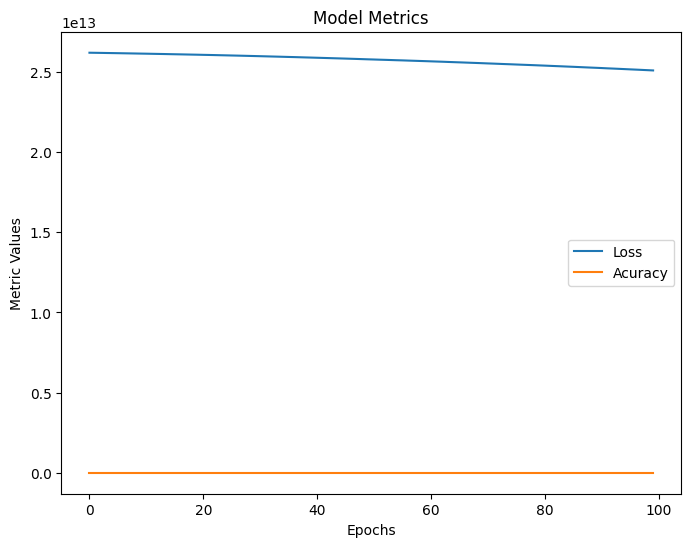

In [ ]:
import matplotlib.pyplot as plt

# Plot only middle-loss & accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Loss')
# Accuracy Placeholder - regression or scored adjustment
plt.plot(history.history.get('mae', []), label='Acuracy')  # Replace it as relevant task (Ideal regression logic for better visuals)
plt.xlabel('Epochs')
plt.ylabel('Metric Values')
plt.title('Model Metrics')
plt.legend()

# Show middle checkpoint progress visibly.
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


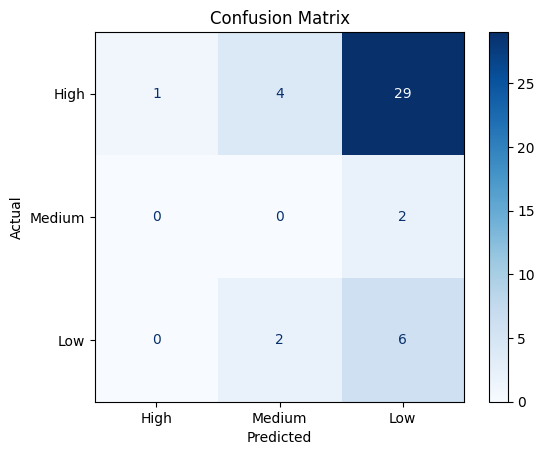

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions using the trained model
y_pred = model.predict(X_test)

# Discretize predictions and true values into categories (for classification)
# For example, classify density into categories: 'Low', 'Medium', 'High'
def discretize_density(value):
    if value < 5:
        return 0  # Low
    elif 5 <= value < 10:
        return 1  # Medium
    else:
        return 2  # High

# Apply discretization for both predicted and true density values
y_true_density = [discretize_density(val[0]) for val in y_test]
y_pred_density = [discretize_density(val[0]) for val in y_pred]

# Generate confusion matrix for density predictions
cm = confusion_matrix(y_true_density, y_pred_density)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['High', 'Medium', 'Low'])
disp.plot(cmap='Blues')

# Plot confusion matrix
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()